In [245]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

import psycopg2 as ps
import pandas.io.sql as sqlio

# Import Tools script
%run Tools.ipynb

In [246]:
conn = ps.connect(dbname="SLA", user="postgres", password="root", host="localhost", port="5432")

In [276]:
# Set variables
variables = ['WEIGHT_VAR', 'CVF_1', 'GROUPEDEB', 'LAST_DIAG', 'CAUSE_DCD']

# Text Query
sql = 'SELECT * FROM "PATIENTS"'

# Get data from database based from the query
data = sqlio.read_sql_query(sql, conn)
# Print all available columns
print(data.columns.values)
# Select wished data
data = data[variables]

['ID' 'SEX' 'DOB' 'ACTPROF' 'LIEUDEB' 'GROUPEDEB' 'AGE_DEBUT'
 'ETUDE_BIOMOL' 'SOD1' 'AUTRE_MUTATION' 'FIRSTSYMPTOM' 'EVOSYMPTOM'
 'RILUZ' 'DIAG' 'DIAGPROBA' 'DATEDIAG' 'NEW_DIAG' 'NEWDIAGPROBA'
 'NEWDATEDIAG' 'DCD' 'DATEDCD' 'CAUSE_DCD' 'CAUSEDCD_SLA' 'CENSURE'
 'LAST_DATE_NEW' 'CVF_31' 'CVF_32' 'CVF_33' 'CVF_34' 'CVF_35' 'WEIGHT_REF'
 'WEIGHT_1' 'WEIGHT_2' 'WEIGHT_3' 'WEIGHT_4' 'WEIGHT_5' 'WEIGHT_6'
 'WEIGHT_7' 'WEIGHT_8' 'WEIGHT_9' 'WEIGHT_10' 'WEIGHT_11' 'WEIGHT_12'
 'WEIGHT_13' 'WEIGHT_14' 'WEIGHT_15' 'WEIGHT_16' 'WEIGHT_17' 'WEIGHT_18'
 'WEIGHT_19' 'WEIGHT_20' 'WEIGHT_21' 'WEIGHT_22' 'WEIGHT_23' 'WEIGHT_24'
 'WEIGHT_25' 'WEIGHT_26' 'WEIGHT_27' 'WEIGHT_28' 'WEIGHT_29' 'WEIGHT_30'
 'WEIGHT_31' 'WEIGHT_32' 'WEIGHT_33' 'WEIGHT_34' 'WEIGHT_35' 'WEIGHT_VAR'
 'WEIGHT_VAR_1' 'WEIGHT_VAR_2' 'WEIGHT_VAR_3' 'WEIGHT_VAR_4'
 'WEIGHT_VAR_5' 'WEIGHT_VAR_6' 'WEIGHT_VAR_7' 'WEIGHT_VAR_8'
 'WEIGHT_VAR_9' 'WEIGHT_VAR_10' 'WEIGHT_VAR_11' 'WEIGHT_VAR_12'
 'WEIGHT_VAR_13' 'WEIGHT_VAR_14' 'WEIGHT_VAR_1

In [248]:
# Have a look from the data
print(data)
data.describe(include='all')

      WEIGHT_VAR       CVF_1 GROUPEDEB LAST_DIAG      CAUSE_DCD
0           3.17   71.495320  Bulbaire       SLA  Liée à la SLA
1           0.00         NaN    Spinal      None           None
2           0.00   93.447290    Spinal       SLA  Liée à la SLA
3           0.00  105.882355    Spinal       SLA  Liée à la SLA
4            NaN         NaN    Spinal       SLA           None
...          ...         ...       ...       ...            ...
1655         NaN         NaN    Spinal       SLA  Liée à la SLA
1656        0.00  114.285706    Spinal       SLA  Liée à la SLA
1657       -1.96  101.382484    Spinal       SLA           None
1658       -1.92   70.754715  Bulbaire       SLA  Liée à la SLA
1659       -3.51   60.459180    Spinal       SLA           None

[1660 rows x 5 columns]


,WEIGHT_VAR,CVF_1,GROUPEDEB,LAST_DIAG,CAUSE_DCD
count,989.000000,963.000000,1495,1463,429
unique,NaN,NaN,3,192,2
top,NaN,NaN,Spinal,SLA,Liée à la SLA
freq,NaN,NaN,1049,1000,403
mean,-0.638109,89.564920,NaN,NaN,NaN
std,4.629631,27.694240,NaN,NaN,NaN
min,-34.850000,6.103286,NaN,NaN,NaN
25%,-2.080000,70.027997,NaN,NaN,NaN
50%,0.000000,92.307686,NaN,NaN,NaN
75%,1.220000,108.603902,NaN,NaN,NaN


In [249]:
# Drop null values
data = data.dropna().copy()

data.describe(include='all')

,WEIGHT_VAR,CVF_1,GROUPEDEB,LAST_DIAG,CAUSE_DCD
count,268.000000,268.000000,268,268,268
unique,NaN,NaN,3,11,2
top,NaN,NaN,Spinal,SLA,Liée à la SLA
freq,NaN,NaN,171,250,253
mean,-1.139067,86.540185,NaN,NaN,NaN
std,4.693850,25.514782,NaN,NaN,NaN
min,-20.290000,18.777292,NaN,NaN,NaN
25%,-3.000000,69.947064,NaN,NaN,NaN
50%,0.000000,88.917125,NaN,NaN,NaN
75%,0.000000,103.698960,NaN,NaN,NaN


In [250]:
data = data[(data.LAST_DIAG == 'SLA')]
data = data[(data.CAUSE_DCD == 'Liée à la SLA')]
data = data.drop(["LAST_DIAG", "CAUSE_DCD"], axis=1)

In [251]:
# Get numerical variables
X = data.drop(data.columns.values[-1], axis=1)

# Get nominal variable
y = data[data.columns.values[-1]]

<AxesSubplot:ylabel='Expression'>

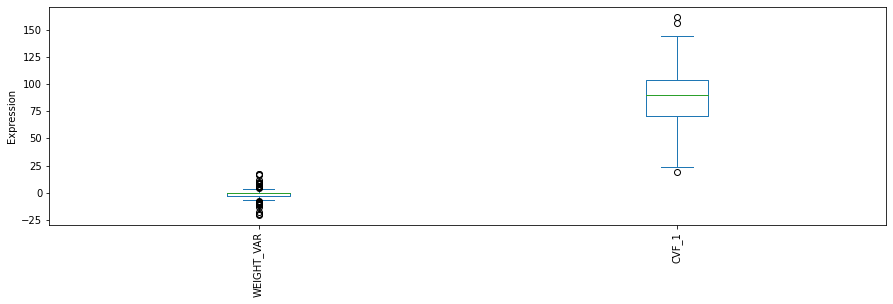

In [252]:
# Show variance from data
sort_by_mean = X.mean().sort_values(ascending=True)
X[sort_by_mean.index].plot(kind='box', figsize=(15, 4), rot=90, ylabel='Expression')

In [253]:
# Normalize data
X_scaled = (X-X.min())/ (X.max() - X.min())

# Have a look from normalized data
print(X_scaled)
X_scaled.describe(include='all')

      WEIGHT_VAR     CVF_1
0       0.622611  0.368576
2       0.538482  0.522052
3       0.538482  0.608991
6       0.538482  0.573971
9       0.538482  0.395042
...          ...       ...
1647    0.461518  0.530378
1649    0.424628  0.644173
1651    0.472134  0.455319
1656    0.538482  0.667743
1658    0.487527  0.363398

[238 rows x 2 columns]


,WEIGHT_VAR,CVF_1
count,238.000000,238.000000
mean,0.510366,0.477143
std,0.126275,0.179901
min,0.000000,0.000000
25%,0.460722,0.363696
50%,0.538482,0.495325
75%,0.538482,0.594336
max,1.000000,1.000000


<AxesSubplot:ylabel='Expression'>

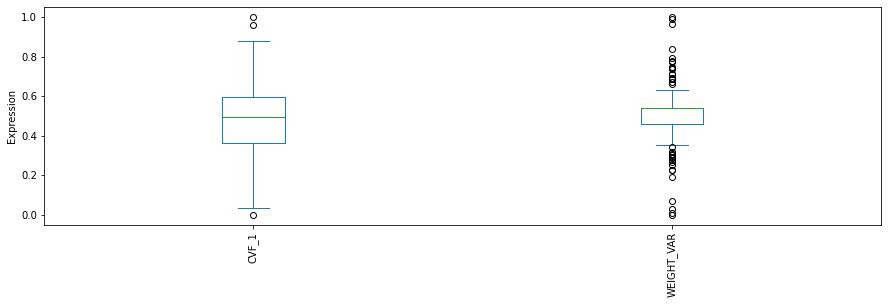

In [254]:
# Show variance from normalized data
sort_by_mean = X_scaled.mean().sort_values(ascending=True)
X_scaled[sort_by_mean.index].plot(kind='box', figsize=(15, 4), rot=90, ylabel='Expression')

# Analyse en composantes principales (ACP)

In [255]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [256]:
# Convert into pandas dataframe
pca_columns = ['PC' + str(c) for c in range(1, X_scaled.shape[1]+1, 1)]
X_pca = pd.DataFrame(X_pca, index=X_scaled.index, columns=pca_columns)
X_pca.head()

,PC1,PC2
0,-0.098243,-0.121384
2,0.047214,-0.024045
3,0.133814,-0.016377
6,0.098931,-0.019466
9,-0.079300,-0.035248


## Calcule de la variance expliquée

In [214]:
# Get explained variance for each principal component
pca.explained_variance_ratio_

array([0.67261905, 0.32738095])

In [215]:
explained_variance = pd.Series(dict(zip(X_pca.columns, 100.0*pca.explained_variance_ratio_)))
print(explained_variance)

PC1    67.261905
PC2    32.738095
dtype: float64


<AxesSubplot:ylabel='Explained variance'>

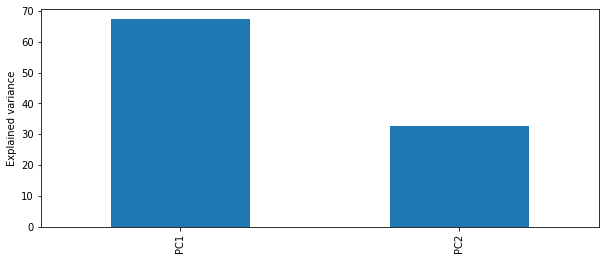

In [216]:
explained_variance.plot(kind='bar', figsize=(10, 4), rot=90, ylabel='Explained variance')

In [173]:
explained_variance['PC1'] + explained_variance['PC2'] + explained_variance['PC3']

KeyError: 'PC3'

## Visualisation des deux premières composantes principales de l'ACP

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

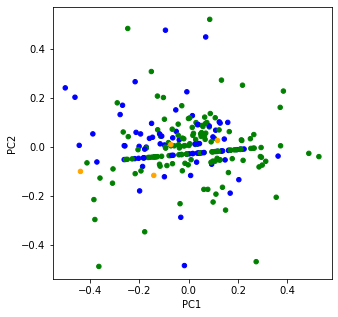

In [174]:
if 'GROUPEDEB' == y.name:
    dict_colors = {'Bulbaire': 'blue', 'Spinal': 'green', 'Respiratoire': 'orange'}
if 'CAUSE_DCD' == y.name:
    dict_colors = {'Liée à la SLA': 'blue', 'Non liée à la SLA': 'green'}
    
if 'SEX' == y.name:
    dict_colors = {'Masculin': 'blue', 'Féminin': 'purple'}
if 'NEWDIAGPROBA' == y.name:
    dict_colors = {'Forme probable avec examens complémentaires': 'blue', 'Forme probable': 'blue', 'Forme certaine':'red'}
if 'DIAGPROBA' == y.name:
    dict_colors = {'Forme probable avec examens complémentaires': 'blue', 'Forme probable': 'blue', 'Forme certaine':'red', 'Forme possible':'blue'}
    
y_colors = [dict_colors[yi] for yi in y]
X_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5,5), color=y_colors)

## Visualisation des trois premières composantes principales de l'ACP

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

KeyError: 'PC3'

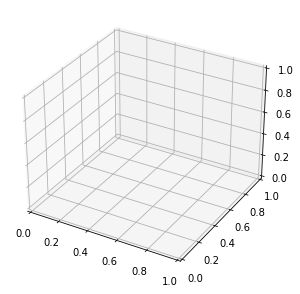

In [176]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('PC1 - ' + str(round(explained_variance['PC1'])))
ax.set_ylabel('PC2 - ' + str(round(explained_variance['PC2'])))
ax.set_zlabel('PC3 - ' + str(round(explained_variance['PC3'])))
ax.view_init(elev=30, azim=30)

# Visualiser les données avec la méthode t-SNE

In [177]:
from sklearn.manifold import TSNE

In [178]:
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

C:\Users\guill\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\guill\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [179]:
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=columns)
X_tsne.head()

,DIM1,DIM2
0,-3.077473,9.736409
2,0.379980,-3.107747
3,6.447177,-8.699220
6,4.804466,-7.250520
9,-3.983815,6.246792


<AxesSubplot:xlabel='DIM1', ylabel='DIM2'>

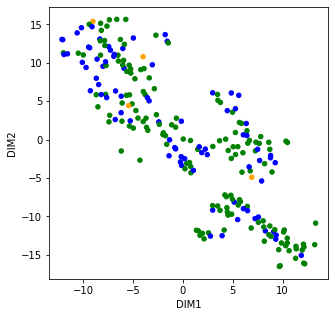

In [180]:
X_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5,5), color=y_colors)

In [181]:
# Divergence value : More lower is the value, more the projection is optimized
tsne.kl_divergence_

0.33228060603141785

## Projection 3d

In [182]:
tsne = TSNE(n_components=3, init='pca', perplexity=25, random_state=0, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

C:\Users\guill\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: n_components=3 must be between 1 and min(n_samples, n_features)=2 with svd_solver='randomized'

In [183]:
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=columns)
X_tsne.head()

,DIM1,DIM2
0,-3.077473,9.736409
2,0.379980,-3.107747
3,6.447177,-8.699220
6,4.804466,-7.250520
9,-3.983815,6.246792


KeyError: 'DIM3'

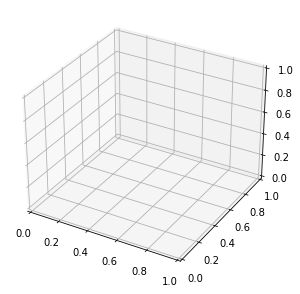

In [184]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=10)

In [185]:
# Divergence value : More lower is the value, more the projection is optimized
tsne.kl_divergence_

AttributeError: 'TSNE' object has no attribute 'kl_divergence_'

# Visualiser les données avec la méthode UMAP

In [186]:
import umap

## Projection 2D

In [187]:
embedding = umap.UMAP(n_components=2, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(X_scaled)
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=X.index, columns=columns)

<AxesSubplot:xlabel='DIM1', ylabel='DIM2'>

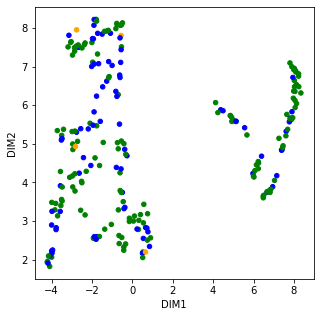

In [188]:
X_umap.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5,5), color=y_colors)

## Projection 3D

In [147]:
embedding = umap.UMAP(n_components=3, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(X_scaled)
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=X.index, columns=columns)

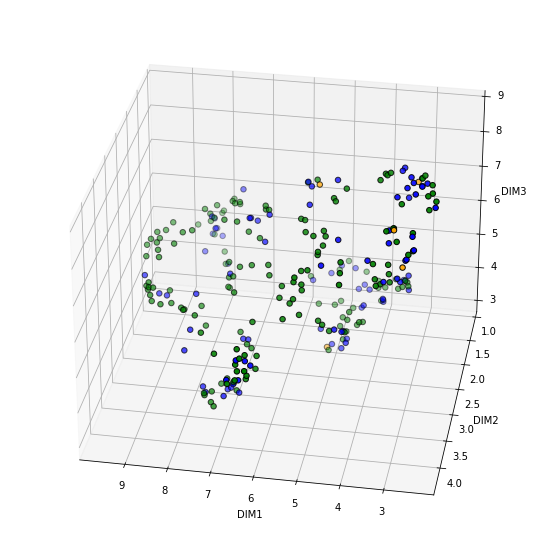

In [148]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_umap['DIM1'], X_umap['DIM2'], X_umap['DIM3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=30, azim=100)

# Hopkins test

In [272]:
X = X_umap
print(X)
d = X.shape[1]
#d = len(vars) # columns
n = len(X) # rows
m = int(0.1 * n)
nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

rand_X = sample(range(0, n, 1), m)

ujd = []
wjd = []
for j in range(0, m):
    u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
    ujd.append(u_dist[0][1])
    w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
    wjd.append(w_dist[0][1])

H = sum(ujd) / (sum(ujd) + sum(wjd))
if isnan(H):
    print(ujd, wjd)
    H = 0

H

          DIM1      DIM2
0    -3.142365  7.809367
2    -3.996261  2.060846
3     7.038378  4.048248
6     6.483760  3.598319
9    -3.410872  5.374042
...        ...       ...
1647 -0.662805  2.622126
1649  0.770424  2.718077
1651 -2.517279  4.025840
1656  7.689316  5.373366
1658 -2.556867  5.388966

[238 rows x 2 columns]


0.8788796670914589